## The Problem
** Source: https://www.nytimes.com/2018/06/21/nyregion/what-is-the-shsat-exam-and-why-does-it-matter.html **

-  Low Number of Black and Latino Students in specialized High Schools.
-  Only 10% of New York City's public school students are black/latino received offers, even though 67% of public students are black/latino
-  Asians make up 62% of students at specialized high schools, even though 16% of public students are asian
-  Whites make up 24% of students at specialized highs schools, even though 15% of public students are white

**Hypothesis:** Before we begin doing any analysis, it's always best to have some ideas in mind to understand why underrepresented groups of students are not receiving the help they need. Here are a few ideas:

-  Community VS Non-Community schools should have an impact to the type of students
-  Race can be a proxy for a student's need of help, this is very debatable
-  A school's location can be a proxy for students in need of help
-  Student overall performance per school can be a proxy as well

In [1]:
# Import the neccessary modules for data manipulation and visual representation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as matplot
import seaborn as sns
%matplotlib inline



In [70]:
!pip install plotly
import plotly


    100% |████████████████████████████████| 36.9MB 771kB/s ta 0:00:011  9% |███▏                            | 3.6MB 6.3MB/s eta 0:00:06
  Running setup.py bdist_wheel for retrying ... done
  Stored in directory: /Users/shreedevi/Library/Caches/pip/wheels/d7/a9/33/acc7b709e2a35caa7d4cae442f6fe6fbf2c43f80823d46460c
Successfully built retrying
distributed 1.21.8 requires msgpack, which is not installed.
You are using pip version 10.0.1, however version 18.0 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [2]:
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly import tools
import plotly.plotly as py

In [3]:
pd.set_option('display.max_columns', None) 
df = pd.read_csv("../Data Files/2016 School Explorer.csv")
SHSAT = pd.read_csv("../data files/D5 SHSAT Registrations and Testers.csv")

In [4]:
df.head()


,Adjusted Grade,New?,Other Location Code in LCGMS,School Name,SED Code,Location Code,District,Latitude,Longitude,Address (Full),City,Zip,Grades,Grade Low,Grade High,Community School?,Economic Need Index,School Income Estimate,Percent ELL,Percent Asian,Percent Black,Percent Hispanic,Percent Black / Hispanic,Percent White,Student Attendance Rate,Percent of Students Chronically Absent,Rigorous Instruction %,Rigorous Instruction Rating,Collaborative Teachers %,Collaborative Teachers Rating,Supportive Environment %,Supportive Environment Rating,Effective School Leadership %,Effective School Leadership Rating,Strong Family-Community Ties %,Strong Family-Community Ties Rating,Trust %,Trust Rating,Student Achievement Rating,Average ELA Proficiency,Average Math Proficiency,Grade 3 ELA - All Students Tested,Grade 3 ELA 4s - All Students,Grade 3 ELA 4s - American Indian or Alaska Native,Grade 3 ELA 4s - Black or African American,Grade 3 ELA 4s - Hispanic or Latino,Grade 3 ELA 4s - Asian or Pacific Islander,Grade 3 ELA 4s - White,Grade 3 ELA 4s - Multiracial,Grade 3 ELA 4s - Limited English Proficient,Grade 3 ELA 4s - Economically Disadvantaged,Grade 3 Math - All Students tested,Grade 3 Math 4s - All Students,Grade 3 Math 4s - American Indian or Alaska Native,Grade 3 Math 4s - Black or African American,Grade 3 Math 4s - Hispanic or Latino,Grade 3 Math 4s - Asian or Pacific Islander,Grade 3 Math 4s - White,Grade 3 Math 4s - Multiracial,Grade 3 Math 4s - Limited English Proficient,Grade 3 Math 4s - Economically Disadvantaged,Grade 4 ELA - All Students Tested,Grade 4 ELA 4s - All Students,Grade 4 ELA 4s - American Indian or Alaska Native,Grade 4 ELA 4s - Black or African American,Grade 4 ELA 4s - Hispanic or Latino,Grade 4 ELA 4s - Asian or Pacific Islander,Grade 4 ELA 4s - White,Grade 4 ELA 4s - Multiracial,Grade 4 ELA 4s - Limited English Proficient,Grade 4 ELA 4s - Economically Disadvantaged,Grade 4 Math - All Students Tested,Grade 4 Math 4s - All Students,Grade 4 Math 4s - American Indian or Alaska Native,Grade 4 Math 4s - Black or African American,Grade 4 Math 4s - Hispanic or Latino,Grade 4 Math 4s - Asian or Pacific Islander,Grade 4 Math 4s - White,Grade 4 Math 4s - Multiracial,Grade 4 Math 4s - Limited English Proficient,Grade 4 Math 4s - Economically Disadvantaged,Grade 5 ELA - All Students Tested,Grade 5 ELA 4s - All Students,Grade 5 ELA 4s - American Indian or Alaska Native,Grade 5 ELA 4s - Black or African American,Grade 5 ELA 4s - Hispanic or Latino,Grade 5 ELA 4s - Asian or Pacific Islander,Grade 5 ELA 4s - White,Grade 5 ELA 4s - Multiracial,Grade 5 ELA 4s - Limited English Proficient,Grade 5 ELA 4s - Economically Disadvantaged,Grade 5 Math - All Students Tested,Grade 5 Math 4s - All Students,Grade 5 Math 4s - American Indian or Alaska Native,Grade 5 Math 4s - Black or African American,Grade 5 Math 4s - Hispanic or Latino,Grade 5 Math 4s - Asian or Pacific Islander,Grade 5 Math 4s - White,Grade 5 Math 4s - Multiracial,Grade 5 Math 4s - Limited English Proficient,Grade 5 Math 4s - Economically Disadvantaged,Grade 6 ELA - All Students Tested,Grade 6 ELA 4s - All Students,Grade 6 ELA 4s - American Indian or Alaska Native,Grade 6 ELA 4s - Black or African American,Grade 6 ELA 4s - Hispanic or Latino,Grade 6 ELA 4s - Asian or Pacific Islander,Grade 6 ELA 4s - White,Grade 6 ELA 4s - Multiracial,Grade 6 ELA 4s - Limited English Proficient,Grade 6 ELA 4s - Economically Disadvantaged,Grade 6 Math - All Students Tested,Grade 6 Math 4s - All Students,Grade 6 Math 4s - American Indian or Alaska Native,Grade 6 Math 4s - Black or African American,Grade 6 Math 4s - Hispanic or Latino,Grade 6 Math 4s - Asian or Pacific Islander,Grade 6 Math 4s - White,Grade 6 Math 4s - Multiracial,Grade 6 Math 4s - Limited English Proficient,Grade 6 Math 4s - Economically Disadvantaged,Grade 7 ELA - All Students Tested,Grade 7 ELA 4s - All Students,Grade 7 ELA 4s - American Indian or Alaska Native,Grade 7 ELA 4s - Black or African American,Grade 7 ELA 4s - His

In [5]:
df.shape

(1272, 161)

In [6]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1272 entries, 0 to 1271
Columns: 161 entries, Adjusted Grade to Grade 8 Math 4s - Economically Disadvantaged
dtypes: float64(5), int64(123), object(33)
memory usage: 1.6+ MB


In [7]:
df.describe()

,SED Code,District,Latitude,Longitude,Zip,Economic Need Index,Average ELA Proficiency,Average Math Proficiency,Grade 3 ELA - All Students Tested,Grade 3 ELA 4s - All Students,Grade 3 ELA 4s - American Indian or Alaska Native,Grade 3 ELA 4s - Black or African American,Grade 3 ELA 4s - Hispanic or Latino,Grade 3 ELA 4s - Asian or Pacific Islander,Grade 3 ELA 4s - White,Grade 3 ELA 4s - Multiracial,Grade 3 ELA 4s - Limited English Proficient,Grade 3 ELA 4s - Economically Disadvantaged,Grade 3 Math - All Students tested,Grade 3 Math 4s - All Students,Grade 3 Math 4s - American Indian or Alaska Native,Grade 3 Math 4s - Black or African American,Grade 3 Math 4s - Hispanic or Latino,Grade 3 Math 4s - Asian or Pacific Islander,Grade 3 Math 4s - White,Grade 3 Math 4s - Multiracial,Grade 3 Math 4s - Limited English Proficient,Grade 3 Math 4s - Economically Disadvantaged,Grade 4 ELA - All Students Tested,Grade 4 ELA 4s - All Students,Grade 4 ELA 4s - American Indian or Alaska Native,Grade 4 ELA 4s - Black or African American,Grade 4 ELA 4s - Hispanic or Latino,Grade 4 ELA 4s - Asian or Pacific Islander,Grade 4 ELA 4s - White,Grade 4 ELA 4s - Multiracial,Grade 4 ELA 4s - Limited English Proficient,Grade 4 ELA 4s - Economically Disadvantaged,Grade 4 Math - All Students Tested,Grade 4 Math 4s - All Students,Grade 4 Math 4s - American Indian or Alaska Native,Grade 4 Math 4s - Black or African American,Grade 4 Math 4s - Hispanic or Latino,Grade 4 Math 4s - Asian or Pacific Islander,Grade 4 Math 4s - White,Grade 4 Math 4s - Multiracial,Grade 4 Math 4s - Limited English Proficient,Grade 4 Math 4s - Economically Disadvantaged,Grade 5 ELA - All Students Tested,Grade 5 ELA 4s - All Students,Grade 5 ELA 4s - American Indian or Alaska Native,Grade 5 ELA 4s - Black or African American,Grade 5 ELA 4s - Hispanic or Latino,Grade 5 ELA 4s - Asian or Pacific Islander,Grade 5 ELA 4s - White,Grade 5 ELA 4s - Multiracial,Grade 5 ELA 4s - Limited English Proficient,Grade 5 ELA 4s - Economically Disadvantaged,Grade 5 Math - All Students Tested,Grade 5 Math 4s - All Students,Grade 5 Math 4s - American Indian or Alaska Native,Grade 5 Math 4s - Black or African American,Grade 5 Math 4s - Hispanic or Latino,Grade 5 Math 4s - Asian or Pacific Islander,Grade 5 Math 4s - White,Grade 5 Math 4s - Multiracial,Grade 5 Math 4s - Limited English Proficient,Grade 5 Math 4s - Economically Disadvantaged,Grade 6 ELA - All Students Tested,Grade 6 ELA 4s - All Students,Grade 6 ELA 4s - American Indian or Alaska Native,Grade 6 ELA 4s - Black or African American,Grade 6 ELA 4s - Hispanic or Latino,Grade 6 ELA 4s - Asian or Pacific Islander,Grade 6 ELA 4s - White,Grade 6 ELA 4s - Multiracial,Grade 6 ELA 4s - Limited English Proficient,Grade 6 ELA 4s - Economically Disadvantaged,Grade 6 Math - All Students Tested,Grade 6 Math 4s - All Students,Grade 6 Math 4s - American Indian or Alaska Native,Grade 6 Math 4s - Black or African American,Grade 6 Math 4s - Hispanic or Latino,Grade 6 Math 4s - Asian or Pacific Islander,Grade 6 Math 4s - White,Grade 6 Math 4s - Multiracial,Grade 6 Math 4s - Limited English Proficient,Grade 6 Math 4s - Economically Disadvantaged,Grade 7 ELA - All Students Tested,Grade 7 ELA 4s - All Students,Grade 7 ELA 4s - American Indian or Alaska Native,Grade 7 ELA 4s - Black or African American,Grade 7 ELA 4s - Hispanic or Latino,Grade 7 ELA 4s - Asian or Pacific Islander,Grade 7 ELA 4s - White,Grade 7 ELA 4s - Multiracial,Grade 7 ELA 4s - Limited English Proficient,Grade 7 ELA 4s - Economically Disadvantaged,Grade 7 Math - All Students Tested,Grade 7 Math 4s - All Students,Grade 7 Math 4s - American Indian or Alaska Native,Grade 7 Math 4s - Black or African American,Grade 7 Math 4s - Hispanic or Latino,Grade 7 Math 4s - Asian or Pacific Islander,Grade 7 Math 4s - White,Grade 7 Math 4s - Multiracial,Grade 7 Math 4s - Limited English Proficient,Grade 7 Math 4s - Economically Disadvantaged,Grade 8 ELA - All Students Tested,Grade 8 ELA 4s - All Students,Grade 8 ELA 4s 

In [8]:

df.columns

Index(['Adjusted Grade', 'New?', 'Other Location Code in LCGMS', 'School Name',
       'SED Code', 'Location Code', 'District', 'Latitude', 'Longitude',
       'Address (Full)',
       ...
       'Grade 8 Math - All Students Tested', 'Grade 8 Math 4s - All Students',
       'Grade 8 Math 4s - American Indian or Alaska Native',
       'Grade 8 Math 4s - Black or African American',
       'Grade 8 Math 4s - Hispanic or Latino',
       'Grade 8 Math 4s - Asian or Pacific Islander',
       'Grade 8 Math 4s - White', 'Grade 8 Math 4s - Multiracial',
       'Grade 8 Math 4s - Limited English Proficient',
       'Grade 8 Math 4s - Economically Disadvantaged'],
      dtype='object', length=161)

In [9]:
df.get_dtype_counts() 

float64      5
int64      123
object      33
dtype: int64

In [10]:
df.loc[:,df.dtypes=='object'].head().T

,0,1,2,3,4
Adjusted Grade,NaN,NaN,NaN,NaN,NaN
New?,NaN,NaN,NaN,NaN,NaN
Other Location Code in LCGMS,NaN,NaN,NaN,NaN,NaN
School Name,P.S. 015 ROBERTO CLEMENTE,P.S. 019 ASHER LEVY,P.S. 020 ANNA SILVER,P.S. 034 FRANKLIN D. ROOSEVELT,THE STAR ACADEMY - P.S.63
Location Code,01M015,01M019,01M020,01M034,01M063
Address (Full),"333 E 4TH ST NEW YORK, NY 10009","185 1ST AVE NEW YORK, NY 10003","166 ESSEX ST NEW YORK, NY 10002","730 E 12TH ST NEW YORK, NY 10009","121 E 3RD ST NEW YORK, NY 10009"
City,NEW YORK,NEW YORK,NEW YORK,NEW YORK,NEW YORK
Grades,"PK,0K,01,02,03,04,05","PK,0K,01,02,03,04,05","PK,0K,01,02,03,04,05","PK,0K,01,02,03,04,05,06,07,08","PK,0K,01,02,03,04,05"
Grade Low,PK,PK,PK,PK,PK
Grade High,05,05,05,08,05


In [11]:
ls = df.filter(regex = '%')
ls.head()
ls.dtypes


Rigorous Instruction %            object
Collaborative Teachers %          object
Supportive Environment %          object
Effective School Leadership %     object
Strong Family-Community Ties %    object
Trust %                           object
dtype: object

In [12]:
# Preprocess some data
# Create a function to convert the percentage to a fraction 
def p2f(x):
    return float(x.strip('%'))/100

df['Percent of Students Chronically Absent']=df['Percent of Students Chronically Absent'].astype(str).apply(p2f)
df['Rigorous Instruction %'] = df['Rigorous Instruction %'].astype(str).apply(p2f)
df['Collaborative Teachers %'] = df['Collaborative Teachers %'].astype(str).apply(p2f)
df['Supportive Environment %'] = df['Supportive Environment %'].astype(str).apply(p2f)
df['Effective School Leadership %'] = df['Effective School Leadership %'].astype(str).apply(p2f)
df['Strong Family-Community Ties %'] = df['Strong Family-Community Ties %'].astype(str).apply(p2f)
df['Trust %'] = df['Trust %'].astype(str).apply(p2f)
df['Student Attendance Rate'] = df['Student Attendance Rate'].astype(str).apply(p2f)




In [13]:
df['School Income Estimate'].head()

0    $31,141.72 
1    $56,462.88 
2    $44,342.61 
3    $31,454.00 
4    $46,435.59 
Name: School Income Estimate, dtype: object

In [14]:
# Removing the $ 
def dollar_to_float(s):
    if type(s) == str:
        return float(s.replace('$','').replace(',','').replace(' ',''))


df['School Income Estimate'] = df['School Income Estimate'].apply(dollar_to_float)

In [15]:
df['School Income Estimate'] = df['School Income Estimate'].fillna(0)
df['Economic Need Index'] = df['Economic Need Index'].fillna(0)

In [16]:
data = [
    {
        'x': df["Longitude"],
        'y': df["Latitude"],
        'text': df["School Name"],
        'mode': 'markers',
        'marker': {
            'color': df["Economic Need Index"],
            'size': df["School Income Estimate"]/4500,
            'showscale': True,
            'colorscale':'Portland'
        }
    }
]

layout= go.Layout(
    title= 'New York School Population (Economic Need Index)',
    xaxis= dict(
        title= 'Longitude'
    ),
    yaxis=dict(
        title='Latitude'
    ))
fig = go.Figure(data=data, layout=layout)
iplot(fig, filename='scatter_hover_labels')

In [17]:
# New York Black/hispanic percentage in schools

df['Percent Asian'] = df['Percent Asian'].apply(p2f)
df['Percent Black'] = df['Percent Black'].apply(p2f)
df['Percent Hispanic'] = df['Percent Hispanic'].apply(p2f)
df['Percent White'] = df['Percent White'].apply(p2f)
df['Percent Black / Hispanic'] = df['Percent Black / Hispanic'].apply(p2f)

In [84]:
data = [
    {
        'x': df["Longitude"],
        'y': df["Latitude"],
        'text': df["School Name"],
        'mode': 'markers',
        'marker': {
            'color': df["Percent Black"],
            'size': df["School Income Estimate"]/4500,
            'showscale': True,
            'colorscale':'Portland'
        }
    }
]

layout= go.Layout(
    title= 'New York Black Student Ratio Of School',
    xaxis= dict(
        title= 'Longitude'
    ),
    yaxis=dict(
        title='Latitude'
    )
)
fig = go.Figure(data=data, layout=layout)
iplot(fig, filename='scatter_hover_labels')

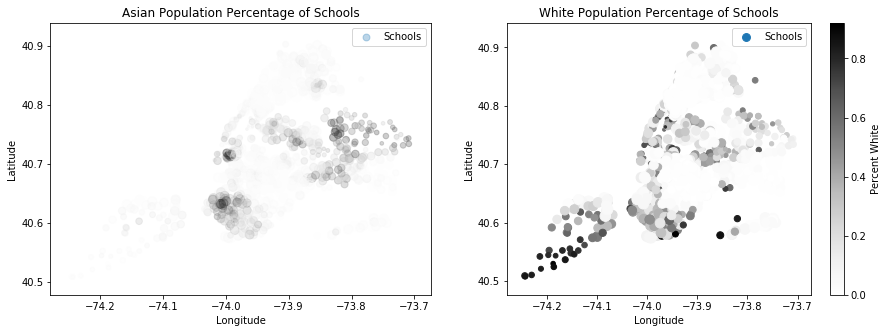

In [18]:
# Asian /white percentahe in schools

# Set up the matplotlib figure
f, axes = plt.subplots(ncols=2, figsize=(15, 6))

df.plot(kind="scatter", x="Longitude", y="Latitude", ax=axes[0],
    s=df['Economic Need Index']*100, c="Percent Asian", label='Schools', title='Asian Population Percentage of Schools',
    colorbar=False, alpha=0.3, figsize=(15,5))

df.plot(kind="scatter", x="Longitude", y="Latitude", ax=axes[1],
    s=df['Economic Need Index']*130, c="Percent White", label='Schools', title='White Population Percentage of Schools',
    colorbar=True, alpha=1, figsize=(15,5))

plt.legend()
plt.show()


## Correlation Matrix
### Using our numeric features, let's take a look at our correlation matrix. Here are some interesting correlations:

### Economic Need Index
-  Schools with **more White Students** have a **lower economic need index**, meaning the schools are operating just fine without the need of help.
-  Schools with more Asian Students have a slightly lower economic need index.
-  Schools with more Black/Hispanic Students have a higher economic need index, meaning the schools are in need of help.
-  Schools with more Chronically Absent Students have a higher economic need index
### School Income Estimate
- Schools with more White/Asian Students have a higher school income estimate.
-  Schools with more Black/Hispanic Students have a lower school income estimate


In [43]:
df2= df.loc[:,df.dtypes=='float64']

In [51]:
df2.drop(["Latitude",'Longitude','Average ELA Proficiency','Average Math Proficiency'],axis = 1,inplace = True)

In [52]:
df2.head().T

,0,1,2,3,4
Economic Need Index,0.919,0.641,0.744,0.86,0.73
School Income Estimate,31141.720,56462.880,44342.610,31454.00,46435.59
Percent Asian,0.050,0.100,0.350,0.05,0.04
Percent Black,0.320,0.200,0.080,0.29,0.20
Percent Hispanic,0.600,0.630,0.490,0.63,0.65
Percent Black / Hispanic,0.920,0.830,0.570,0.92,0.84
Percent White,0.010,0.060,0.040,0.04,0.10
Student Attendance Rate,0.940,0.920,0.940,0.92,0.93
Percent of Students Chronically Absent,0.180,0.300,0.200,0.28,0.23
Rigorous Instruction %,0.890,0.960,0.870,0.85,0.90


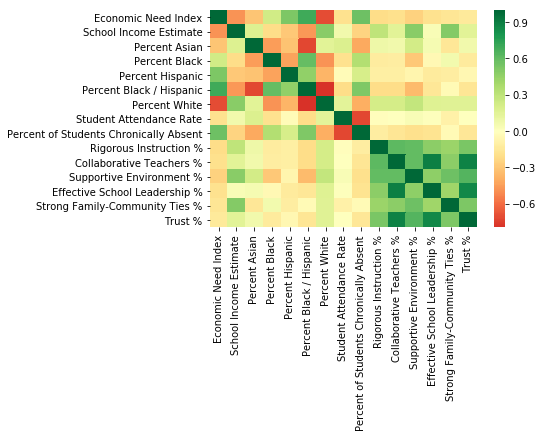

In [58]:
# correlation matrix

corr = df2.corr()
sns.heatmap(corr,
           xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
            cmap="RdYlGn", center=0)

## Student Race and Economic need Index

-  Schools with a Higher White and Asian Population tend to have a Lower Economic Need Index Score.
-  Schools with a Higher Hispanic and Black Population tend to have a Higher Economic Need Index Score.
#### My main focus is to try and understand what is making the Hispanic and Black Students in need of help.

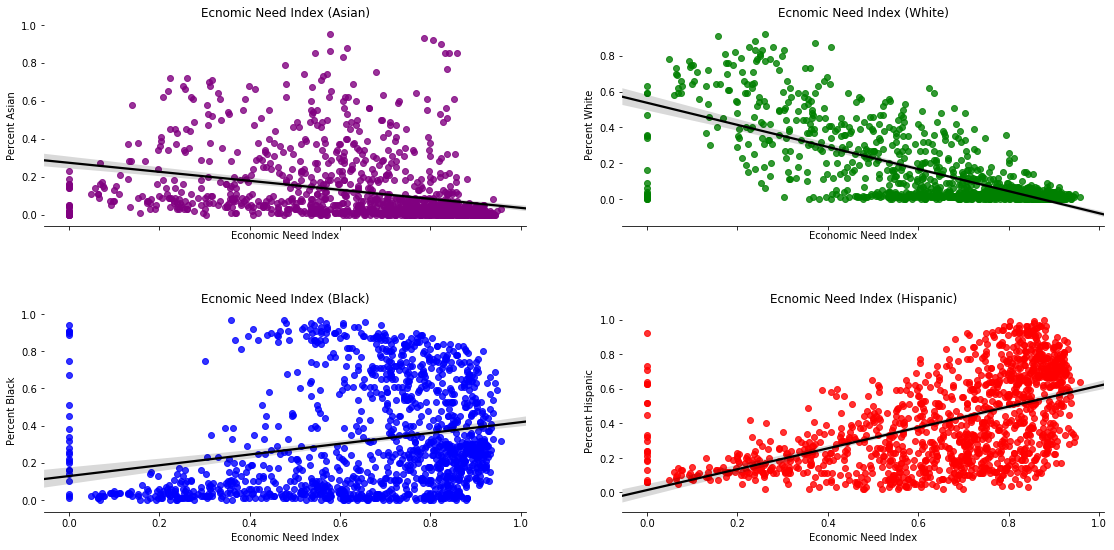

In [59]:
f, axes = plt.subplots(2, 2, figsize=(19, 9), sharex=True)
sns.despine(left=True)

sns.regplot(x=df["Economic Need Index"], y=df["Percent Asian"], color='purple', ax=axes[0, 0], line_kws={"color": "black"})
sns.regplot(x=df["Economic Need Index"], y=df["Percent White"], color='g', ax=axes[0, 1], line_kws={"color": "black"})
sns.regplot(x=df["Economic Need Index"], y=df["Percent Black"], color='b', ax=axes[1, 0], line_kws={"color": "black"})
sns.regplot(x=df["Economic Need Index"], y=df["Percent Hispanic"], color='r', ax=axes[1, 1], line_kws={"color": "black"})

axes[0,0].set_title('Ecnomic Need Index (Asian)')
axes[0,1].set_title('Ecnomic Need Index (White)')
axes[1,0].set_title('Ecnomic Need Index (Black)')
axes[1,1].set_title('Ecnomic Need Index (Hispanic)')

plt.subplots_adjust(hspace=0.4)

## Schools and Student attendance

### **Question**
#### Is there a difference between students in schools high-low attendance rate?dea

#### With these two groups, we can perform some hypothesis testing to see if there really are any statistical significance of different metrics (ex. Income, Economic Index Need, and Race) between Schools with 30% Absent Rate and 10% Absent Rate.

In [60]:
# Create a dataframe of schools with an absent rate of 30% or more.
absent_30 = df[df['Percent of Students Chronically Absent']>=.30]

# Create a dataframe of schools with an absent rate of 11% or less.
absent_11 = df[df['Percent of Students Chronically Absent']<=.11]

# Exploring School Absent Rate 
df['Percent of Students Chronically Absent'].describe()

count    1247.000000
mean        0.215750
std         0.140716
min         0.000000
25%         0.110000
50%         0.200000
75%         0.300000
max         1.000000
Name: Percent of Students Chronically Absent, dtype: float64

In [61]:
# Exploring the schools with 30% absent rate

absent_30.iloc[:,[15,16,17,23,19,20,21,22]].describe()

,Economic Need Index,School Income Estimate,Percent White,Percent Asian,Percent Black,Percent Hispanic,Percent Black / Hispanic
count,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000
mean,0.840624,24213.924788,0.025455,0.027212,0.455091,0.477121,0.932121
std,0.080521,17646.702137,0.040520,0.039312,0.225843,0.228938,0.066482
min,0.369000,0.000000,0.000000,0.000000,0.010000,0.020000,0.480000
25%,0.807500,0.000000,0.010000,0.010000,0.260000,0.270000,0.920000
50%,0.857500,27338.415000,0.020000,0.010000,0.440000,0.485000,0.950000
75%,0.898750,35521.105000,0.030000,0.030000,0.660000,0.680000,0.970000
max,0.957000,79244.110000,0.460000,0.320000,0.950000,0.920000,0.990000


### Schools with 30% Absent Ratio:
-  Average Economic Need Index at 84%
-  Average School Income at $33,000
-  Asians and Whites make up about 5% of the students in these schools
-  Blacks and Hispanics make up about 95% of the students in these schools


In [62]:
# Schools with 10% abdent rate

absent_11.iloc[:,[15,16,17,23,19,20,21,22]].describe()

,Economic Need Index,School Income Estimate,Percent White,Percent Asian,Percent Black,Percent Hispanic,Percent Black / Hispanic
count,326.000000,326.000000,326.000000,326.000000,326.000000,326.000000,326.000000
mean,0.484862,44751.846319,0.254632,0.238436,0.187239,0.293374,0.480644
std,0.226285,36657.241653,0.249776,0.246289,0.272421,0.245842,0.325940
min,0.049000,0.000000,0.000000,0.000000,0.000000,0.020000,0.030000
25%,0.295250,0.000000,0.020000,0.040000,0.020000,0.120000,0.200000
50%,0.488500,46699.660000,0.180000,0.140000,0.060000,0.200000,0.370000
75%,0.682000,69124.027500,0.437500,0.397500,0.220000,0.397500,0.870000
max,0.878000,181382.060000,0.910000,0.950000,0.970000,1.000000,1.000000


### Schools with 10% Absent Ratio:
-  Average Economic Need Index at 48%
-  Average School Income at $64,000
-  Asians and Whites make up about 52% of the students in these schools.
-  Blacks and Hispanics make up about 48% of the students in these schools.

### Student ELA & Math performance by race

In [63]:
# Display the Mean ELA and Math Scores for Black/Hispanic Dominant Schools
df[df['Percent Black / Hispanic'] >= .70][['Average ELA Proficiency','Average Math Proficiency']].mean()

Average ELA Proficiency     2.352136
Average Math Proficiency    2.439736
dtype: float64

In [64]:
# Display the Mean ELA and Math Scores for Black/Hispanic Dominant Schools
df[df['Percent Black / Hispanic'] <= .30][['Average ELA Proficiency','Average Math Proficiency']].mean()

Average ELA Proficiency     3.046919
Average Math Proficiency    3.326919
dtype: float64

### Interesting Find:

-  Black/Hispanic dominant schools have an Average ELA Score of 2.35.
-  Black/Hispanic dominant schools have an Average Math Score of 2.44.
-  White/Asian dominant schools have an Average ELA Score of 3.04.
-  White/Asian dominant schools have an Average Math Score of 3.32.
-  And if you look at the distributions of both groups below, you can definitely see a clear distinction between the Quality of Math and ELA Performance.

/Users/shreedevi/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning:

invalid value encountered in greater

/Users/shreedevi/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning:

invalid value encountered in less



Text(0,0.5,'Frequency Count')

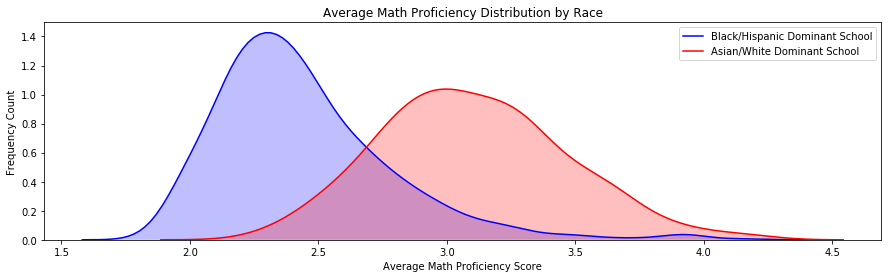

In [65]:
# Create New Column for Black/Hispanic Dominant Schools
df['Black_Hispanic_Dominant'] = df['Percent Black / Hispanic'] >= .70

#KDEPlot: Kernel Density Estimate Plot
fig = plt.figure(figsize=(15,4))
ax=sns.kdeplot(df.loc[(df['Black_Hispanic_Dominant'] == True),'Average Math Proficiency'] , color='b',shade=True, label='Black/Hispanic Dominant School')
ax=sns.kdeplot(df.loc[(df['Black_Hispanic_Dominant'] == False),'Average Math Proficiency'] , color='r',shade=True, label='Asian/White Dominant School')
plt.title('Average Math Proficiency Distribution by Race')
plt.xlabel('Average Math Proficiency Score')
plt.ylabel('Frequency Count')

### ELA and Math scores by  race (Grades 3-8)

In [76]:
# Create the math scores for each race
asian_math = []
asian_math.append(sum(df['Grade 3 Math 4s - Asian or Pacific Islander']))
asian_math.append(sum(df['Grade 4 Math 4s - Asian or Pacific Islander']))
asian_math.append(sum(df['Grade 5 Math 4s - Asian or Pacific Islander']))
asian_math.append(sum(df['Grade 6 Math 4s - Asian or Pacific Islander']))
asian_math.append(sum(df['Grade 7 Math 4s - Asian or Pacific Islander']))
asian_math.append(sum(df['Grade 8 Math 4s - Asian or Pacific Islander']))

white_math = []
white_math.append(sum(df['Grade 3 Math 4s - White']))
white_math.append(sum(df['Grade 4 Math 4s - White']))
white_math.append(sum(df['Grade 5 Math 4s - White']))
white_math.append(sum(df['Grade 6 Math 4s - White']))
white_math.append(sum(df['Grade 7 Math 4s - White']))
white_math.append(sum(df['Grade 8 Math 4s - White']))

black_math = []
black_math.append(sum(df['Grade 3 Math 4s - Black or African American']))
black_math.append(sum(df['Grade 4 Math 4s - Black or African American']))
black_math.append(sum(df['Grade 5 Math 4s - Black or African American']))
black_math.append(sum(df['Grade 6 Math 4s - Black or African American']))
black_math.append(sum(df['Grade 7 Math 4s - Black or African American']))
black_math.append(sum(df['Grade 8 Math 4s - Black or African American']))

hispanic_math = []
hispanic_math.append(sum(df['Grade 3 Math 4s - Hispanic or Latino']))
hispanic_math.append(sum(df['Grade 4 Math 4s - Hispanic or Latino']))
hispanic_math.append(sum(df['Grade 5 Math 4s - Hispanic or Latino']))
hispanic_math.append(sum(df['Grade 6 Math 4s - Hispanic or Latino']))
hispanic_math.append(sum(df['Grade 7 Math 4s - Hispanic or Latino']))
hispanic_math.append(sum(df['Grade 8 Math 4s - Hispanic or Latino']))

In [77]:
raceMathScores = pd.DataFrame({'Asian Math':asian_math,'Black Math':black_math,"White Math": 
                             white_math,'Hispanic Math':hispanic_math})
raceMathScores['Grades']=[3,4,5,6,7,8]
raceMathScores

,Asian Math,Black Math,White Math,Hispanic Math,Grades
0,5121,2869,3829,3581,3
1,5024,2240,3704,3457,4
2,4133,1120,2992,2115,5
3,5456,1856,3804,2907,6
4,4282,951,2947,1730,7
5,2524,776,1235,1205,8


In [82]:
trace1 = go.Scatter(
    x = raceMathScores['Grades'],
    y = raceMathScores['Asian Math'],
    name = 'Asian Students'
)

trace2 = go.Scatter(
    x = raceMathScores['Grades'],
    y = raceMathScores['Hispanic Math'],
    name = 'Hispanic Students'
)

trace3 = go.Scatter(
    x = raceMathScores['Grades'],
    y = raceMathScores['Black Math'],
    name = 'Black Students'
)

trace4 = go.Scatter(
    x = raceMathScores['Grades'],
    y = raceMathScores['White Math'],
    name = 'White Students'
)

layout= go.Layout(
    title= 'Student Math 4s Performance By Grade (Race)',
    xaxis= dict(
        title= 'Grade Level'
    ),
    yaxis=dict(
        title='# of Students Receiving Math 4s'
    )
)

data = [trace1, trace2, trace3, trace4]

fig = go.Figure(data=data, layout=layout)
iplot(fig, filename='scatter_hover_labels')

In [83]:
# Overview of summary (Turnover V.S. Non-turnover)
turnover_Summary = df.groupby('Community School?')
turnover_Summary[['Economic Need Index', 'School Income Estimate', 'Percent Asian','Percent Black', 'Percent Hispanic', 
                  'Percent White', 'Average ELA Proficiency', 'Average Math Proficiency']].mean()

,Economic Need Index,School Income Estimate,Percent Asian,Percent Black,Percent Hispanic,Percent White,Average ELA Proficiency,Average Math Proficiency
Community School?,,,,,,,,
No,0.646713,34733.531070,0.122232,0.314038,0.404289,0.138462,2.560298,2.706322
Yes,0.853487,11774.702632,0.025921,0.413158,0.525526,0.024211,2.137067,2.100000


### Community Schools:

-  Has higher economic need index
-  Average School Income = $38k
-  Average % Black/Hispanic = 93%

### Not Community Schools:

-  Has lower economic need index
-  Average School Income = $47k
-  Average % Black/Hispanic = 70%

## School Income VS Economic Need Index
### There is definitely a negative correlation between School Income and their Economic Need Index. It makes sense:

-  The less income you make the higher economic need index you'll get.
-  The more income you make the less economic need index you'll get.

In [84]:
# Let's normalize the School Income Estimate to have better visualization
from sklearn import preprocessing

# Impute the missing Income with the median
median = df['School Income Estimate'].median()
df['School Income Estimate'] = df['School Income Estimate'].fillna(median)


# Create x, where x the 'scores' column's values as floats
x = df[['School Income Estimate']].values.astype(float)

# Create a minimum and maximum processor object
min_max_scaler = preprocessing.MinMaxScaler()

# Create an object to transform the data to fit minmax processor
x_scaled = min_max_scaler.fit_transform(x)

# Run the normalizer on the dataframe
school_income_normalized = pd.DataFrame(x_scaled)

df['school_income_normalized'] = school_income_normalized

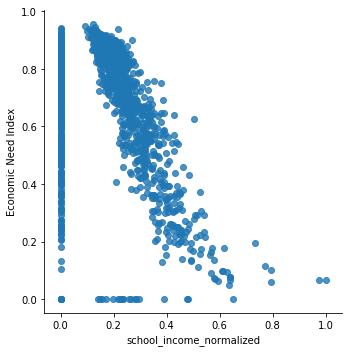

In [85]:
sns.lmplot(x='school_income_normalized', y='Economic Need Index', data=df,
           fit_reg=False) # No regression line
        

## Average School Income Comparison


Text(0.5,1,'Community School VS Not Community School Income')

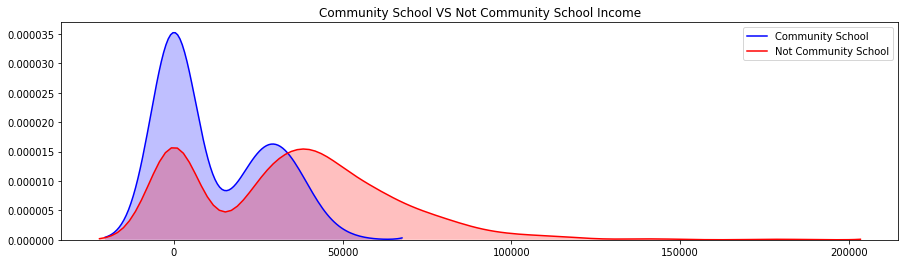

In [87]:
#KDEPlot: Kernel Density Estimate Plot
fig = plt.figure(figsize=(15,4))
sns.kdeplot(df.loc[(df['Community School?'] == 'Yes'),'School Income Estimate'] , color='b',shade=True, label='Community School')
sns.kdeplot(df.loc[(df['Community School?'] == 'No'),'School Income Estimate'] , color='r',shade=True, label='Not Community School')
plt.title('Community School VS Not Community School Income')

 **Interesting Find:** Looks like the breaking point for school income of Community Schools are at around $50k

 **Interesting Find:** Non Community Schools receive an income up to over $175k!

Text(0.5,1,'Community School VS Not Community School Economic Need Index')

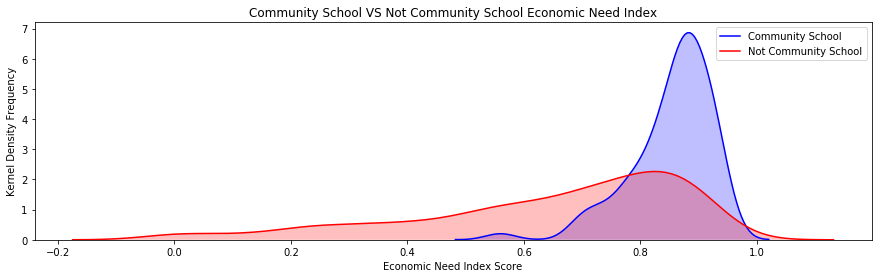

In [88]:
#KDEPlot: Kernel Density Estimate Plot
fig = plt.figure(figsize=(15,4))
sns.kdeplot(df.loc[(df['Community School?'] == 'Yes'),'Economic Need Index'] , color='b',shade=True, label='Community School')
sns.kdeplot(df.loc[(df['Community School?'] == 'No'),'Economic Need Index'] , color='r',shade=True, label='Not Community School')
plt.xlabel('Economic Need Index Score')
plt.ylabel('Kernel Density Frequency')
plt.title('Community School VS Not Community School Economic Need Index')

** Community Schools** definitely need more help and a majority of them are within the Economic Need Index of 90%.

** Non Community Schools ** have a wide distribution of their Economic Need Index scores, having a majority at the 80% score.

## Number of schools 

In [91]:
df.groupby('City')['Zip'].count().head()

City
ARVERNE           2
ASTORIA           6
BAYSIDE          13
BELLEROSE         4
BROAD CHANNEL     1
Name: Zip, dtype: int64

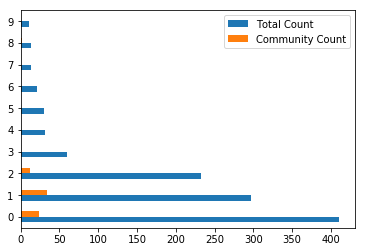

In [111]:
city = df.groupby('City')['Zip'].count().reset_index().sort_values('Zip',ascending = False).reset_index(drop = True)
city_community= df[df['Community School?'] == 'Yes'].groupby('City')['Zip'].count().reset_index().sort_values('Zip',ascending = False).reset_index(drop = True)


CommunitySchoolsInCity = pd.merge(city,city_community,how = 'left',on = 'City')
CommunitySchoolsInCity.fillna(0,inplace = True)
CommunitySchoolsInCity['Zip_y']= CommunitySchoolsInCity['Zip_y'].astype(int)

# Cities with most community schools

top10 = CommunitySchoolsInCity.iloc[:10,]
top10 = top10.rename(columns ={"Zip_x": 'Total Count','Zip_y': 'Community Count'})
top10.plot(kind = 'barh')

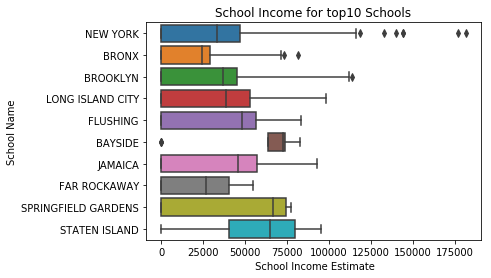

In [114]:
top10City =list(top10.City)
tempdf = df[df.City.isin(top10City)]
sns.boxplot(x='School Income Estimate',y='City',data = tempdf)
plt.title("School Income for top10 Schools")
plt.xlabel(" School Income Estimate")
plt.ylabel("School Name")
plt.show()

## SHSAT Registration Content


In [116]:
SHSAT.head()

,DBN,School name,Year of SHST,Grade level,Enrollment on 10/31,Number of students who registered for the SHSAT,Number of students who took the SHSAT
0,05M046,P.S. 046 Arthur Tappan,2013,8,91,31,14
1,05M046,P.S. 046 Arthur Tappan,2014,8,95,26,7
2,05M046,P.S. 046 Arthur Tappan,2015,8,73,21,10
3,05M046,P.S. 046 Arthur Tappan,2016,8,56,20,8
4,05M123,P.S. 123 Mahalia Jackson,2013,8,62,31,14


In [117]:
SHSAT.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140 entries, 0 to 139
Data columns (total 7 columns):
DBN                                                140 non-null object
School name                                        140 non-null object
Year of SHST                                       140 non-null int64
Grade level                                        140 non-null int64
Enrollment on 10/31                                140 non-null int64
Number of students who registered for the SHSAT    140 non-null int64
Number of students who took the SHSAT              140 non-null int64
dtypes: int64(5), object(2)
memory usage: 7.7+ KB


### Total SHSAT Registration Count Per School (2013-2016)

In [120]:
registrationPerYear = pd.DataFrame(SHSAT.groupby('Year of SHST')['Number of students who registered for the SHSAT']
                                  .sum()).reset_index()
registrationPerYear

,Year of SHST,Number of students who registered for the SHSAT
0,2013,660
1,2014,838
2,2015,597
3,2016,575


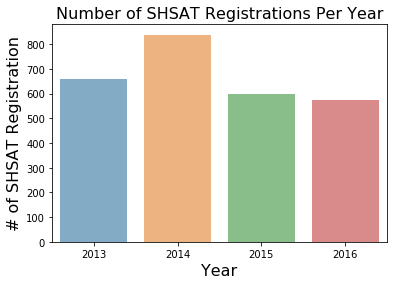

In [126]:

sns.barplot(y=registrationPerYear['Number of students who registered for the SHSAT'], x=registrationPerYear['Year of SHST'], alpha=0.6)
plt.title("Number of SHSAT Registrations Per Year", fontsize=16)
plt.xlabel("Year", fontsize=16)
plt.ylabel("# of SHSAT Registration", fontsize=16)
plt.show()

## Top 10 schools with more registration

In [134]:
# craeating a datafamre of students who took SHSAT

school_registered = SHSAT.groupby('School name')['Number of students who registered for the SHSAT'].sum().reset_index().sort_values(
    "Number of students who registered for the SHSAT",ascending = False).reset_index(drop=True)
schoo_take = SHSAT.groupby("School name")['Number of students who took the SHSAT'].sum().reset_index().sort_values(
'Number of students who took the SHSAT',ascending = False).reset_index(drop=True)

school_regd_take = pd.merge(school_registered,schoo_take,how = 'left',on = 'School name')
school_regd_take.head(10)

,School name,Number of students who registered for the SHSAT,Number of students who took the SHSAT
0,KIPP Infinity Charter School,296,65
1,KIPP STAR College Prep Charter School,292,96
2,Columbia Secondary School,253,179
3,Democracy Prep Endurance Charter School,194,94
4,Democracy Prep Charter School,145,100
5,Frederick Douglass Academy,122,65
6,I.S. M286 Renaissance Leadership Academy,109,28
7,P.S. 129 John H. Finley,108,48
8,P.S. 046 Arthur Tappan,98,39
9,KAPPA IV,97,40


### It's really interesting to see the actual amount of students who took the test and registered.

** some schools have a higher Take-to-Register rate?**

## K-Means Clustering: School Economic Need and Income Estimate¶

**Let's see if there is any sort of cluster of schools:**

-  Critical Help (Red): Schools in red have a high economic need with an Estimate Income < 50,000
-  Moderate Help (Green): Schools in green have a low-moderate economic need with an Estimate Income < 50,000-75,000
-  Low Help (Blue): Schools in blue have a low economic need with an Estimate Income > 75,000


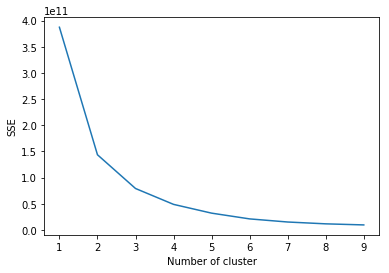

In [143]:
from sklearn.cluster import KMeans
df_zero = df[df['Economic Need Index']!= 0]
df_zero2 = df_zero[df_zero['School Income Estimate']!= 0]

data = df_zero2[['Economic Need Index','School Income Estimate']]

sse = {}

for k in range(1,10):
    kmeans = KMeans(n_clusters=k,max_iter=1000).fit(data) 
    data['clusters'] = kmeans.labels_
    sse[k] = kmeans.inertia_ # intertia is sum of distances of sample to their closest cluster center
    
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()    


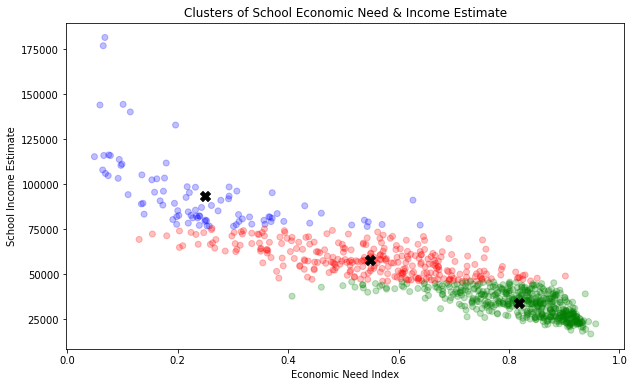

In [148]:
kmeans = KMeans(n_clusters= 3, random_state= 2)
kmeans.fit(data)
#kmeans_colours = ['green'if c==0 else 'red' if c==2 else 'yellow' else c== 3 else 'blue' for c in kmeans.labels_]
kmeans_colors = ['green' if c == 0 else 'red' if c == 2 else 'yellow' if c == 3 else 'blue' for c in kmeans.labels_]

fig = plt.figure(figsize=(10, 6))
plt.scatter(x="Economic Need Index",y="School Income Estimate", data=data,
            alpha=0.25,color = kmeans_colors)
plt.xlabel("Economic Need Index")
plt.ylabel("School Income Estimate")
plt.scatter(x=kmeans.cluster_centers_[:,0],y=kmeans.cluster_centers_[:,1],color="black",marker="X",s=100)
plt.title("Clusters of School Economic Need & Income Estimate")
plt.show()

In [151]:
kmeans.cluster_centers_


array([[8.17523207e-01, 3.39040335e+04, 4.50632911e+00],
       [2.49202247e-01, 9.35166081e+04, 2.53932584e+00],
       [5.47295918e-01, 5.80726213e+04, 4.04421769e+00]])

### Geography
-  Central and Upper New York have schools that are mostly in need of help
- Central and Upper New York contains most of the underperforming students Race
-  Majority of Blacks attend schools in the Central part of New York
-  Majority of Hispanics attend schools in the Upper part of New York
-  Schools with 30% or more Absent Rate have an average of 95% Black/Hispanic Dominated Schools
-  On average, Black/Hispanic have a lower ELA & Math Performance Scores than White/Asian
-  Overall, Asians received the most 4s in ELA and Math Performance.
** Conclusion**


- Services are needed for mostly the Hispanic/Black student population  Which are located mostly in Central and Upper Parts of New York.